## *Importing Libarires/Dependices*

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## *Data PreProcessing*

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape
#There are total 891 passengers

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# We checking if any data points are null
pd.isna(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [7]:
data = data.drop(columns='Cabin', axis=1)
#we'll drop the Cabin feature since not a lot more useful information can be extracted from it.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
pd.isna(data).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# we cannot find mean for Embarked columns so we replace with the value that repeated most of the time 
mode_data=(data['Embarked'].mode())
print(mode_data)

0    S
Name: Embarked, dtype: object


In [12]:
#now we are goning to replace the 2 missing values with S
data=data.fillna({"Embarked": "S"})

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## *Data Analysis And Visulisation*

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data['Survived'].value_counts()
#0 denotes they died and 1 denotes they survived the accident

0    549
1    342
Name: Survived, dtype: int64

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

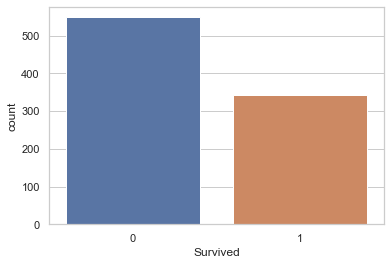

In [17]:
x=data['Survived']
sns.countplot(x=x,data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

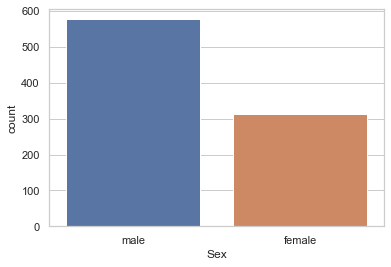

In [18]:
x=data['Sex']
sns.countplot(x=x,data=data)

In [19]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

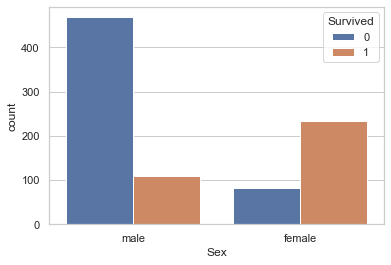

In [20]:
#Number of survivours gender wise
x=data['Sex']
sns.countplot(x=x, hue='Survived', data=data)

In [21]:
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


<AxesSubplot:xlabel='Pclass', ylabel='count'>

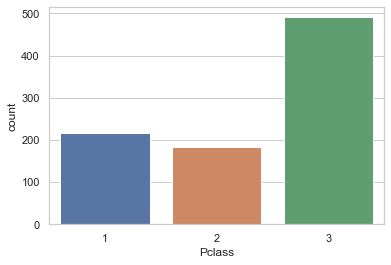

In [22]:
# making a count plot for "Pclass" column
x=data['Pclass']
sns.countplot(x=x, data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

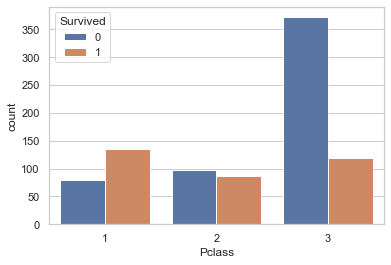

In [23]:
x=data['Pclass']
sns.countplot(x=x, hue='Survived', data=data)

In [24]:
print("Percentage of Pclass 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


In [25]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
#even though 1st class people are less they survide more than compared to 3rd class and many 3rd class poepl died

In [27]:
# converting categorical Columns
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [29]:
#features and target variables Independant or Depedant columns

In [30]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = data['Survived']

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [34]:
X.shape

(891, 7)

In [35]:
print(X_train.shape,X_test.shape)

(712, 7) (179, 7)


### *For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy*

In [36]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
result1=round(gaussian.score(X_test, Y_test)*100,2)
print("The Accuracy in predecting is :",result1 )

The Accuracy in predecting is : 79.33


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, Y_train)

result2=round(model.score(X_test,Y_test)*100,2)
print("The Accuracy in predecting is :",result2 )

The Accuracy in predecting is : 82.68


In [38]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

result3=round(knn.score(X_test,Y_test)*100,2)
print("The Accuracy in predecting is :",result3 )

The Accuracy in predecting is : 70.39


In [39]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)

result4=round(decisiontree.score(X_test,Y_test)*100,2)
print("The Accuracy in predecting is :",result4 )

The Accuracy in predecting is : 77.65


In [40]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)

result5=round(randomforest.score(X_test,Y_test)*100,2)
print("The Accuracy in predecting is :",result5 )

The Accuracy in predecting is : 82.12


In [41]:
models = pd.DataFrame({'Model': ['Naive Bayes', 'Logistic Regression', 
               'KNN','Decision Tree','Random Forest'],
    'Score': [result1,result2,result3,result4,result5]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,82.68
4,Random Forest,82.12
0,Naive Bayes,79.33
3,Decision Tree,77.65
2,KNN,70.39
